In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading Dataset


In [2]:
data =pd.read_csv('drug200.csv')

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
data.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [6]:
data.describe(include="all")

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


#Checking any missing values in data


In [7]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
names= ['Age','Sex','BP','Cholesterol','Na_to_K','Drug']
names

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

In [10]:
enumerate(names)

In [11]:
for i,j in enumerate(names):
  print(i,j)

0 Age
1 Sex
2 BP
3 Cholesterol
4 Na_to_K
5 Drug


#Identifying Independent and Dependent Variables

In [47]:
# identifying independent variables
x= data.iloc[:,:6].values
x
     


array([[23, 'F', 'HIGH', 'HIGH', 25.355, 'DrugY'],
       [47, 'M', 'LOW', 'HIGH', 13.093, 'drugC'],
       [47, 'M', 'LOW', 'HIGH', 10.114, 'drugC'],
       ...,
       [52, 'M', 'NORMAL', 'HIGH', 9.894, 'drugX'],
       [23, 'M', 'NORMAL', 'NORMAL', 14.02, 'drugX'],
       [40, 'F', 'LOW', 'NORMAL', 11.349, 'drugX']], dtype=object)

In [19]:
#identifying dependent variables
y= data.iloc[:,3].values
y

array(['HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'NORMAL', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH',
       'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH',
       'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'NORMAL', 'NORMAL',
       'HIGH', 'NORMAL', 'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'NORMAL',
       'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'HIGH', 'NORMAL', 'HIGH',
       'NORMAL', 'HIGH', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'HIGH',
       'NORMAL', 'HIGH', 'NORMAL', 'HIGH', 'NORMAL', 'HIGH', 'HIGH',
       'HIGH', 'NORMAL', 'NORMAL', 'NORMAL', 'HIGH', 'NORMAL', 'HIGH',
       'NORMAL', 'HIGH', 'HIGH', 'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'NORMAL', 'NORMAL', 'HIGH', 'NORMAL', 'HIGH', 'NORMAL',
       'HIGH', 'NORMAL', 'HIGH', 'HIGH', 'NORMAL', 'NORMAL', 'NORMAL'

#Performing One-Hot Encoding

#For Sex Column

In [69]:
# Text data need to be converted into number format 
# For Sex column
data=pd.concat([data,pd.get_dummies(data["Sex"],prefix="Gender")],axis=1)
data.drop(["Sex"],axis=1,inplace=True)
data.head() 

,Age,BP,Cholesterol,Na_to_K,Drug,Gender_F,Gender_M
0,23,HIGH,HIGH,25.355,DrugY,1,0
1,47,LOW,HIGH,13.093,drugC,0,1
2,47,LOW,HIGH,10.114,drugC,0,1
3,28,NORMAL,HIGH,7.798,drugX,1,0
4,61,LOW,HIGH,18.043,DrugY,1,0


# For BP Column

In [70]:
data=pd.concat([data,pd.get_dummies(data["BP"],prefix="BP_Range")],axis=1)
data.drop(["BP"],axis=1,inplace=True)
data.head() 

,Age,Cholesterol,Na_to_K,Drug,Gender_F,Gender_M,BP_Range_HIGH,BP_Range_LOW,BP_Range_NORMAL
0,23,HIGH,25.355,DrugY,1,0,1,0,0
1,47,HIGH,13.093,drugC,0,1,0,1,0
2,47,HIGH,10.114,drugC,0,1,0,1,0
3,28,HIGH,7.798,drugX,1,0,0,0,1
4,61,HIGH,18.043,DrugY,1,0,0,1,0


#For Cholesterol Column

In [71]:
data=pd.concat([data,pd.get_dummies(data["Cholesterol"],prefix="Fat_Range")],axis=1)
data.drop(["Cholesterol"],axis=1,inplace=True)
data.head() 

,Age,Na_to_K,Drug,Gender_F,Gender_M,BP_Range_HIGH,BP_Range_LOW,BP_Range_NORMAL,Fat_Range_HIGH,Fat_Range_NORMAL
0,23,25.355,DrugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,DrugY,1,0,0,1,0,1,0


In [72]:
drug_type = data["Drug"]
data.drop(["Drug"],axis=1,inplace=True)
data=pd.concat([data,drug_type], axis=1)

In [73]:
data.head()

,Age,Na_to_K,Gender_F,Gender_M,BP_Range_HIGH,BP_Range_LOW,BP_Range_NORMAL,Fat_Range_HIGH,Fat_Range_NORMAL,Drug
0,23,25.355,1,0,1,0,0,1,0,DrugY
1,47,13.093,0,1,0,1,0,1,0,drugC
2,47,10.114,0,1,0,1,0,1,0,drugC
3,28,7.798,1,0,0,0,1,1,0,drugX
4,61,18.043,1,0,0,1,0,1,0,DrugY


In [74]:
#now we scale the numerical columns of dataset ['Age', 'Na_to_K']
data["Age"]=(data["Age"]-data["Age"].mean())/(data["Age"].max()-data["Age"].min())
data["Na_to_K"]=(data["Na_to_K"]-data["Na_to_K"].mean())/(data["Na_to_K"].max()-data["Na_to_K"].min())

In [75]:
data.head()

,Age,Na_to_K,Gender_F,Gender_M,BP_Range_HIGH,BP_Range_LOW,BP_Range_NORMAL,Fat_Range_HIGH,Fat_Range_NORMAL,Drug
0,-0.361271,0.289903,1,0,1,0,0,1,0,DrugY
1,0.045508,-0.093548,0,1,0,1,0,1,0,drugC
2,0.045508,-0.186706,0,1,0,1,0,1,0,drugC
3,-0.276525,-0.259131,1,0,0,0,1,1,0,drugX
4,0.282797,0.061246,1,0,0,1,0,1,0,DrugY


In [78]:
X = data.iloc[:,0:-1]
Y = data.iloc[:,[-1]]

In [79]:
X

,Age,Na_to_K,Gender_F,Gender_M,BP_Range_HIGH,BP_Range_LOW,BP_Range_NORMAL,Fat_Range_HIGH,Fat_Range_NORMAL
0,-0.361271,0.289903,1,0,1,0,0,1,0
1,0.045508,-0.093548,0,1,0,1,0,1,0
2,0.045508,-0.186706,0,1,0,1,0,1,0
3,-0.276525,-0.259131,1,0,0,0,1,1,0
4,0.282797,0.061246,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,0.198051,-0.141269,1,0,0,1,0,1,0
196,-0.479915,-0.127540,0,1,0,1,0,1,0
197,0.130254,-0.193586,0,1,0,0,1,1,0
198,-0.361271,-0.064560,0,1,0,0,1,0,1


In [80]:
Y

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


#Splitting X and Y

In [81]:
X = X.astype(float)

In [82]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
onecode=OneHotEncoder()

In [84]:
encode_y=onecode.fit_transform(Y.values.reshape(-1,1)).toarray()
encode_y

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0.

In [87]:
train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

# Generate TrainX and TrainY
trainX, testX, trainY, testY = train_test_split(X, encode_y, test_size= 1 - train_ratio)
# Genearate ValX, TestX, ValY and TestY
valX, testX, valY, testY = train_test_split(testX, testY, test_size=test_ratio/(test_ratio + validation_ratio))

#Build ANN Model

In [88]:
checkpoint_no = 'ckpt_1_ANN'
model_name = 'Bird_ANN_2FC_F64_64_epoch_25'

In [89]:
input_shape = trainX.shape[1]

n_batch_size = 10

n_steps_per_epoch = int(trainX.shape[0] / n_batch_size)
n_validation_steps = int(valX.shape[0] / n_batch_size)
n_test_steps = int(testX.shape[0] / n_batch_size)

n_epochs = 25

num_classes = trainY.shape[1]

print('Input Shape: ' + str(input_shape))
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()
print('Validation Steps: ' + str(n_validation_steps))
print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))
print()
print('Number of Classes: ' + str(num_classes))

Input Shape: 9
Batch Size: 10

Steps per Epoch: 13

Validation Steps: 3
Test Steps: 3

Number of Epochs: 25

Number of Classes: 5


In [91]:
from keras import models
from keras import layers
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [92]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [93]:
# Prepare a directory to store all the checkpoints.
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

In [94]:
keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, 
                                   monitor='val_loss', save_best_only=True, mode='auto')]

#Training ANN Model

In [96]:
history = model.fit(trainX,
                    trainY,
                    steps_per_epoch=n_steps_per_epoch,
                    epochs=n_epochs,
                    batch_size=n_batch_size,
                    validation_data=(valX, valY),
                    validation_steps=n_validation_steps,
                    callbacks=[keras_callbacks])

Epoch 1/25
 1/13 [=>............................] - ETA: 11s - loss: 1.6757 - accuracy: 0.0000e+00

13/13 [==============================] - 2s 94ms/step - loss: 1.5489 - accuracy: 0.3538 - val_loss: 1.4647 - val_accuracy: 0.3667
Epoch 2/25
 1/13 [=>............................] - ETA: 0s - loss: 1.5107 - accuracy: 0.3333

13/13 [==============================] - 1s 70ms/step - loss: 1.3795 - accuracy: 0.4651 - val_loss: 1.3546 - val_accuracy: 0.3667
Epoch 3/25
 1/13 [=>............................] - ETA: 0s - loss: 1.5209 - accuracy: 0.2000

13/13 [==============================] - 1s 76ms/step - loss: 1.2650 - accuracy: 0.4419 - val_loss: 1.2661 - val_accuracy: 0.3667
Epoch 4/25
 1/13 [=>............................] - ETA: 0s - loss: 1.1266 - accuracy: 0.5000

13/13 [==============================] - 1s 78ms/step - loss: 1.1035 - accuracy: 0.5271 - val_loss: 1.1694 - val_accuracy: 0.4667
Epoch 5/25
 1/13 [=>............................] - ETA: 0s - loss: 1.1370 - accuracy: 0.4000

13/13 [==============================] - 1s 62ms/step - loss: 1.0466 - accuracy: 0.5736 - val_loss: 1.0693 - val_accuracy: 0.4000
Epoch 6/25
 1/13 [=>............................] - ETA: 0s - loss: 0.8362 - accuracy: 0.6000

13/13 [==============================] - 1s 65ms/step - loss: 0.8906 - accuracy: 0.5659 - val_loss: 0.9666 - val_accuracy: 0.4667
Epoch 7/25
 1/13 [=>............................] - ETA: 0s - loss: 0.6301 - accuracy: 0.8000

13/13 [==============================] - 1s 93ms/step - loss: 0.7747 - accuracy: 0.7829 - val_loss: 0.8549 - val_accuracy: 0.6000
Epoch 8/25
 1/13 [=>............................] - ETA: 0s - loss: 0.8491 - accuracy: 0.7000

13/13 [==============================] - 1s 60ms/step - loss: 0.6577 - accuracy: 0.7674 - val_loss: 0.7878 - val_accuracy: 0.5667
Epoch 9/25
 1/13 [=>............................] - ETA: 0s - loss: 0.9106 - accuracy: 0.6000

13/13 [==============================] - 1s 65ms/step - loss: 0.5964 - accuracy: 0.8217 - val_loss: 0.6633 - val_accuracy: 0.5667
Epoch 10/25
 1/13 [=>............................] - ETA: 0s - loss: 0.4821 - accuracy: 0.9000

13/13 [==============================] - 1s 61ms/step - loss: 0.5214 - accuracy: 0.8527 - val_loss: 0.5795 - val_accuracy: 0.7000
Epoch 11/25
 1/13 [=>............................] - ETA: 0s - loss: 0.5181 - accuracy: 0.9000

13/13 [==============================] - 1s 64ms/step - loss: 0.4617 - accuracy: 0.8682 - val_loss: 0.5288 - val_accuracy: 0.7333
Epoch 12/25
 1/13 [=>............................] - ETA: 0s - loss: 0.4224 - accuracy: 0.9000

13/13 [==============================] - 1s 64ms/step - loss: 0.3726 - accuracy: 0.9070 - val_loss: 0.4693 - val_accuracy: 0.7667
Epoch 13/25
 1/13 [=>............................] - ETA: 0s - loss: 0.3489 - accuracy: 1.0000

13/13 [==============================] - 1s 66ms/step - loss: 0.3493 - accuracy: 0.8992 - val_loss: 0.4485 - val_accuracy: 0.8667
Epoch 14/25
 1/13 [=>............................] - ETA: 0s - loss: 0.3353 - accuracy: 0.9000

13/13 [==============================] - 1s 64ms/step - loss: 0.3162 - accuracy: 0.9070 - val_loss: 0.3762 - val_accuracy: 0.9333
Epoch 15/25
 1/13 [=>............................] - ETA: 0s - loss: 0.1705 - accuracy: 1.0000

13/13 [==============================] - 1s 67ms/step - loss: 0.2807 - accuracy: 0.9308 - val_loss: 0.3437 - val_accuracy: 0.9333
Epoch 16/25
 1/13 [=>............................] - ETA: 0s - loss: 0.2002 - accuracy: 1.0000

13/13 [==============================] - 1s 102ms/step - loss: 0.2546 - accuracy: 0.9225 - val_loss: 0.3224 - val_accuracy: 0.9333
Epoch 17/25
 1/13 [=>............................] - ETA: 0s - loss: 0.1558 - accuracy: 1.0000

13/13 [==============================] - 1s 78ms/step - loss: 0.2147 - accuracy: 0.9535 - val_loss: 0.3181 - val_accuracy: 0.9333
Epoch 18/25
 1/13 [=>............................] - ETA: 0s - loss: 0.2785 - accuracy: 1.0000

13/13 [==============================] - 1s 71ms/step - loss: 0.2234 - accuracy: 0.9302 - val_loss: 0.2911 - val_accuracy: 0.9333
Epoch 19/25
 1/13 [=>............................] - ETA: 0s - loss: 0.1863 - accuracy: 1.0000

13/13 [==============================] - 1s 67ms/step - loss: 0.2024 - accuracy: 0.9767 - val_loss: 0.2691 - val_accuracy: 0.9333
Epoch 20/25
 1/13 [=>............................] - ETA: 0s - loss: 0.1354 - accuracy: 1.0000

13/13 [==============================] - 1s 88ms/step - loss: 0.1491 - accuracy: 0.9690 - val_loss: 0.2567 - val_accuracy: 0.9333
Epoch 21/25
 1/13 [=>............................] - ETA: 0s - loss: 0.1849 - accuracy: 1.0000

13/13 [==============================] - 1s 89ms/step - loss: 0.1773 - accuracy: 0.9767 - val_loss: 0.2541 - val_accuracy: 0.9667
Epoch 22/25
 1/13 [=>............................] - ETA: 0s - loss: 0.2711 - accuracy: 0.8000

13/13 [==============================] - 1s 85ms/step - loss: 0.1770 - accuracy: 0.9457 - val_loss: 0.2532 - val_accuracy: 0.9667
Epoch 23/25
13/13 [==============================] - 0s 6ms/step - loss: 0.1776 - accuracy: 0.9457 - val_loss: 0.2719 - val_accuracy: 0.8333
Epoch 24/25
 1/13 [=>............................] - ETA: 0s - loss: 0.1835 - accuracy: 0.9000

13/13 [==============================] - 1s 62ms/step - loss: 0.1320 - accuracy: 0.9690 - val_loss: 0.2186 - val_accuracy: 0.9667
Epoch 25/25
13/13 [==============================] - 0s 4ms/step - loss: 0.1252 - accuracy: 0.9845 - val_loss: 0.2189 - val_accuracy: 0.9667


In [97]:
hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()

,epoch,loss,accuracy,val_loss,val_accuracy
0,1,1.548920,0.353846,1.464735,0.366667
1,2,1.379544,0.465116,1.354582,0.366667
2,3,1.265043,0.441860,1.266060,0.366667
3,4,1.103480,0.527132,1.169350,0.466667
4,5,1.046600,0.573643,1.069319,0.400000


In [98]:
values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
values_of_best_model

,epoch,loss,accuracy,val_loss,val_accuracy
23,24,0.132007,0.968992,0.21864,0.966667


In [99]:
class_assignment = dict(zip(Y, encode_y))

df_temp = pd.DataFrame([class_assignment], columns=class_assignment.keys())
df_temp = df_temp.stack()
df_temp = pd.DataFrame(df_temp).reset_index().drop(['level_0'], axis=1)
df_temp.columns = ['Category', 'Allocated Number']

df_temp.to_csv(checkpoint_no + '/' + 'class_assignment_df_' + model_name + '.csv')

print('Class assignment:')
class_assignment

Class assignment:


{'Drug': array([1., 0., 0., 0., 0.])}

In [102]:
import pickle as pk
pk.dump(onecode, open(checkpoint_no + '/' + 'encoder.pkl', 'wb'))


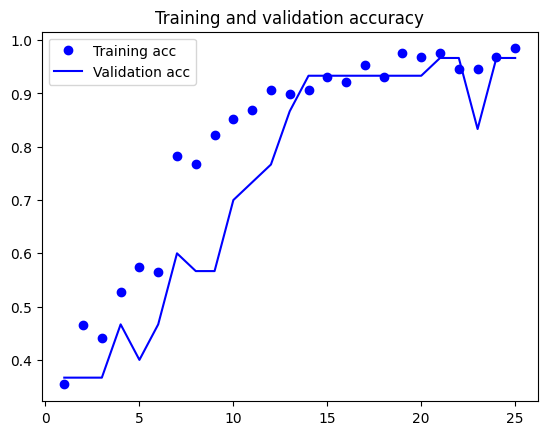

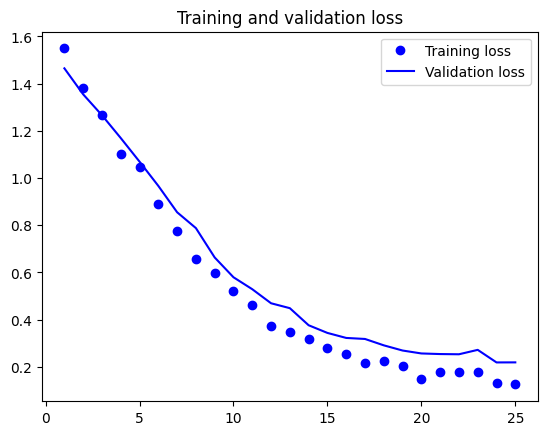

In [103]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [104]:
from keras.models import load_model
import shutil
# Loading the automatically saved model
model_reloaded = load_model(checkpoint_no + '/' + model_name)

# Saving the best model in the correct path and format
root_directory = os.getcwd()
checkpoint_dir = os.path.join(root_directory, checkpoint_no)
model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
model_reloaded.save(model_name_temp)

# Deletion of the automatically created folder under Model Checkpoint File.
folder_name_temp = os.path.join(checkpoint_dir, model_name)
shutil.rmtree(folder_name_temp, ignore_errors=True)

In [105]:
best_model = load_model(model_name_temp)

In [106]:
test_loss, test_acc = best_model.evaluate(testX,
                                          testY,
                                          steps=n_test_steps)
print()
print('Test Accuracy:', test_acc)

3/3 [==============================] - 0s 4ms/step - loss: 0.1424 - accuracy: 1.0000

Test Accuracy: 1.0


#Prediction of Test data

In [107]:
y_pred = model.predict(testX)
y_pred[:5]

1/1 [==============================] - 0s 90ms/step


array([[9.9921721e-01, 1.8690375e-07, 1.4438810e-05, 3.5972571e-05,
        7.3215115e-04],
       [9.9958414e-01, 2.5353179e-07, 1.0597875e-05, 6.1305829e-05,
        3.4364391e-04],
       [2.7438616e-02, 2.9365182e-02, 2.4469162e-03, 9.0796006e-01,
        3.2789182e-02],
       [9.9999982e-01, 3.1736377e-11, 1.9981051e-08, 1.0504746e-07,
        4.8448520e-08],
       [1.5082927e-01, 1.0762269e-02, 5.6604561e-03, 7.7266186e-01,
        6.0086053e-02]], dtype=float32)

In [108]:
encoder_reload = pk.load(open(checkpoint_dir + '/' + 'encoder.pkl','rb'))

In [109]:
re_transformed_y_pred = encoder_reload.inverse_transform(y_pred)
re_transformed_y_pred[:5]

array([['DrugY'],
       ['DrugY'],
       ['drugC'],
       ['DrugY'],
       ['drugC']], dtype=object)

In [110]:
testX['re_transformed_y_pred'] = re_transformed_y_pred
testX

,Age,Na_to_K,Gender_F,Gender_M,BP_Range_HIGH,BP_Range_LOW,BP_Range_NORMAL,Fat_Range_HIGH,Fat_Range_NORMAL,re_transformed_y_pred
122,-0.174831,0.199247,0.0,1.0,0.0,0.0,1.0,1.0,0.0,DrugY
28,-0.090085,0.206783,1.0,0.0,0.0,1.0,0.0,0.0,1.0,DrugY
82,-0.208729,-0.199277,1.0,0.0,0.0,1.0,0.0,1.0,0.0,drugC
128,0.045508,0.545923,0.0,1.0,0.0,1.0,0.0,0.0,1.0,DrugY
158,0.248898,-0.176386,1.0,0.0,0.0,1.0,0.0,1.0,0.0,drugC
56,0.350593,-0.148367,0.0,1.0,1.0,0.0,0.0,0.0,1.0,drugB
116,0.384492,-0.205469,0.0,1.0,0.0,0.0,1.0,0.0,1.0,drugX
107,-0.039237,0.122851,0.0,1.0,0.0,1.0,0.0,1.0,0.0,DrugY
91,-0.056186,-0.029035,0.0,1.0,1.0,0.0,0.0,0.0,1.0,DrugY
161,0.215000,-0.191991,1.0,0.0,1.0,0.0,0.0,0.0,1.0,drugB
